# AMAZON SALES REPORT


#### importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
from math import ceil
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#### loading the dataset

In [2]:
df = pd.read_csv("C://Users//quays//Downloads//Amazon Sale Report.csv")
df_copy = df.copy()  # making a copy of the original data 

## Exploratory data analysis (EDA)

In [3]:
df.head()  # viewing the top 4 rows of the data

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Unnamed: 5,Unnamed: 6,Category,Size,Unnamed: 9,...,Amount,ship-city,ship-state,Unnamed: 16,Unnamed: 17,promotion-ids,B2B,fulfilled-by,Unnamed: 21,Unnamed: 22
0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,NaN,NaN,Set,S,NaN,...,647.62,MUMBAI,MAHARASHTRA,NaN,NaN,NaN,False,Easy Ship,NaN,NaN
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,NaN,NaN,kurta,3XL,NaN,...,406.00,BENGALURU,KARNATAKA,NaN,NaN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,NaN
2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,NaN,NaN,kurta,XL,NaN,...,329.00,NAVI MUMBAI,MAHARASHTRA,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,NaN
3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,NaN,NaN,Western Dress,L,NaN,...,753.33,PUDUCHERRY,PUDUCHERRY,NaN,NaN,NaN,False,Easy Ship,NaN,NaN
4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,NaN,NaN,Top,3XL,NaN,...,574.00,CHENNAI,TAMIL NADU,NaN,NaN,NaN,False,NaN,NaN,NaN


In [4]:
df.tail()  # viewing the last four rows 

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Unnamed: 5,Unnamed: 6,Category,Size,Unnamed: 9,...,Amount,ship-city,ship-state,Unnamed: 16,Unnamed: 17,promotion-ids,B2B,fulfilled-by,Unnamed: 21,Unnamed: 22
128970,05-31-22,Shipped,Amazon,Amazon.in,Expedited,NaN,NaN,kurta,XL,NaN,...,517.0,HYDERABAD,TELANGANA,NaN,NaN,NaN,False,NaN,NaN,NaN
128971,05-31-22,Shipped,Amazon,Amazon.in,Expedited,NaN,NaN,Set,M,NaN,...,999.0,GURUGRAM,HARYANA,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,NaN
128972,05-31-22,Shipped,Amazon,Amazon.in,Expedited,NaN,NaN,Western Dress,XXL,NaN,...,690.0,HYDERABAD,TELANGANA,NaN,NaN,NaN,False,NaN,NaN,NaN
128973,05-31-22,Shipped,Amazon,Amazon.in,Expedited,NaN,NaN,Set,XS,NaN,...,1199.0,Halol,Gujarat,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,NaN
128974,05-31-22,Shipped,Amazon,Amazon.in,Expedited,NaN,NaN,Set,S,NaN,...,696.0,Raipur,CHHATTISGARH,NaN,NaN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN,NaN


In [5]:
df.shape  # checking the shape of the data

(128975, 23)

In [6]:
df.duplicated().sum()  # checking for sum of the duplicated rows

3345

In [7]:
df.drop_duplicates(inplace = True) # removing all the duplicated rows 

In [8]:
df.columns  # checking the field/column names of the data

Index(['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Unnamed: 5', 'Unnamed: 6', 'Category', 'Size', 'Unnamed: 9',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'Unnamed: 16', 'Unnamed: 17', 'promotion-ids', 'B2B',
       'fulfilled-by', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [9]:
df.nunique()  # checking the number of unique values of each field

Date                    91
Status                  13
Fulfilment               2
Sales Channel            2
ship-service-level       2
Unnamed: 5               0
Unnamed: 6               0
Category                 9
Size                    11
Unnamed: 9               0
Courier Status           3
Qty                     10
currency                 1
Amount                1410
ship-city             8955
ship-state              69
Unnamed: 16              0
Unnamed: 17              0
promotion-ids         5787
B2B                      2
fulfilled-by             1
Unnamed: 21              0
Unnamed: 22              0
dtype: int64

In [10]:
((df.isnull().sum()) / df.shape[0]) * 100  # percent of null values in each field

Date                    0.000000
Status                  0.000000
Fulfilment              0.000000
Sales Channel           0.000000
ship-service-level      0.000000
Unnamed: 5            100.000000
Unnamed: 6            100.000000
Category                0.000000
Size                    0.000000
Unnamed: 9            100.000000
Courier Status          5.131736
Qty                     0.000000
currency                5.579877
Amount                  5.579877
ship-city               0.025472
ship-state              0.025472
Unnamed: 16           100.000000
Unnamed: 17           100.000000
promotion-ids          37.451246
B2B                     0.000000
fulfilled-by           69.286795
Unnamed: 21           100.000000
Unnamed: 22           100.000000
dtype: float64

In [11]:
df.drop(['Unnamed: 5','Unnamed: 6','Unnamed: 9','Unnamed: 16','Unnamed: 17','Unnamed: 21','Unnamed: 22','fulfilled-by','currency'], axis = 1, inplace = True)  # dropping fields with more than or 70 % null values 

In [12]:
df.dropna(inplace = True)  # dropping the left null values in the fields 

In [13]:
df.dtypes  # checking for the data types of the fields 

Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
Amount                float64
ship-city              object
ship-state             object
promotion-ids          object
B2B                      bool
dtype: object

In [14]:
df['Date'] = pd.to_datetime(df['Date'])  # converting the date to datetime 

In [15]:
df.info()  # summary of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78230 entries, 1 to 128974
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                78230 non-null  datetime64[ns]
 1   Status              78230 non-null  object        
 2   Fulfilment          78230 non-null  object        
 3   Sales Channel       78230 non-null  object        
 4   ship-service-level  78230 non-null  object        
 5   Category            78230 non-null  object        
 6   Size                78230 non-null  object        
 7   Courier Status      78230 non-null  object        
 8   Qty                 78230 non-null  int64         
 9   Amount              78230 non-null  float64       
 10  ship-city           78230 non-null  object        
 11  ship-state          78230 non-null  object        
 12  promotion-ids       78230 non-null  object        
 13  B2B                 78230 non-null  bool     

In [16]:
df.describe(include = 'all')  # statistics of the data

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,promotion-ids,B2B
count,78230,78230,78230,78230,78230,78230,78230,78230,78230.000000,78230.000000,78230,78230,78230,78230
unique,91,12,2,1,2,9,11,2,NaN,NaN,7381,65,5787,2
top,2022-04-20 00:00:00,Shipped,Amazon,Amazon.in,Expedited,Set,M,Shipped,NaN,NaN,BENGALURU,MAHARASHTRA,IN Core Free Shipping 2015/04/08 23-48-5-108,False
freq,1253,45855,46158,78230,46154,32720,14179,77440,NaN,NaN,5864,11305,44789,77687
first,2022-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.004704,675.097942,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079326,275.621719,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,477.000000,NaN,NaN,NaN,NaN


In [17]:
# convering all the objects to numeric data types 
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
df['B2B'] = encoder.fit_transform(df['B2B'])

In [18]:
df.dtypes  # rechecking the data types 

Date                  datetime64[ns]
Status                          int8
Fulfilment                      int8
Sales Channel                   int8
ship-service-level              int8
Category                        int8
Size                            int8
Courier Status                  int8
Qty                            int64
Amount                       float64
ship-city                      int16
ship-state                      int8
promotion-ids                  int16
B2B                            int64
dtype: object

In [19]:
df  # reviewing the dataset

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,promotion-ids,B2B
1,2022-04-30,5,1,0,1,8,0,0,1,406.0,637,21,2051,0
2,2022-04-30,3,0,0,0,8,8,0,1,329.0,4430,26,5766,1
5,2022-04-30,3,0,0,0,5,8,0,1,824.0,2057,55,5766,0
6,2022-04-30,3,0,0,0,5,5,0,1,653.0,1156,8,5766,0
7,2022-04-30,5,1,0,1,8,7,0,1,399.0,2378,53,2156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128957,2022-05-31,3,0,0,0,5,6,0,1,1349.0,5453,20,5766,0
128968,2022-05-31,3,0,0,0,5,8,0,1,824.0,1719,12,5766,0
128971,2022-05-31,3,0,0,0,5,6,0,1,999.0,2152,17,5766,0
128973,2022-05-31,3,0,0,0,5,9,0,1,1199.0,2401,16,5766,0


In [20]:
df.describe(include = 'all')  # statistics of the data fields

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,promotion-ids,B2B
count,78230,78230.000000,78230.000000,78230.0,78230.000000,78230.000000,78230.000000,78230.000000,78230.000000,78230.000000,78230.000000,78230.000000,78230.000000,78230.000000
unique,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2022-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.963671,0.409971,0.0,0.410022,6.335575,6.349827,0.010098,1.004704,675.097942,3221.027253,31.216349,4631.303324,0.006941
std,NaN,1.487804,0.491831,0.0,0.491840,1.495217,2.843373,0.099983,0.079326,275.621719,1989.456547,17.755383,1744.995370,0.083024
min,NaN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,3.000000,0.000000,0.0,0.000000,5.000000,5.000000,0.000000,1.000000,477.000000,1393.000000,20.000000,3760.000000,0.000000


## Data Visualisation 

#### univariate visualisation

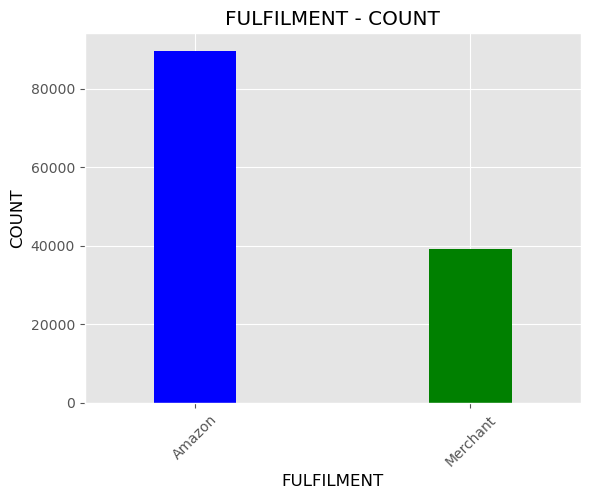

In [21]:
# barplot for the fulfilment field
plt.style.use('ggplot')
df_copy['Fulfilment'].value_counts().plot(kind = 'bar', width = 0.3, color = ['blue', 'green'])
plt.xticks(rotation = 45)
plt.ylabel('COUNT', color = 'black')
plt.xlabel('FULFILMENT', color = 'black')
plt.title('FULFILMENT - COUNT', color = 'black')
plt.show()

Text(0.5, 1.0, 'ship-service-level')

<Figure size 640x480 with 0 Axes>

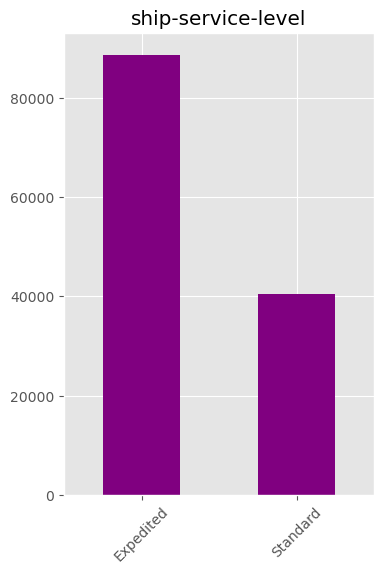

In [22]:
plt.tight_layout()
plt.figure(figsize = (4, 6))
df_copy['ship-service-level'].value_counts().plot(kind = 'bar', color = 'purple')
plt.xticks(rotation = 45)
plt.title('ship-service-level', color = 'black')

Text(0.5, 1.0, 'Courier Status')

<Figure size 640x480 with 0 Axes>

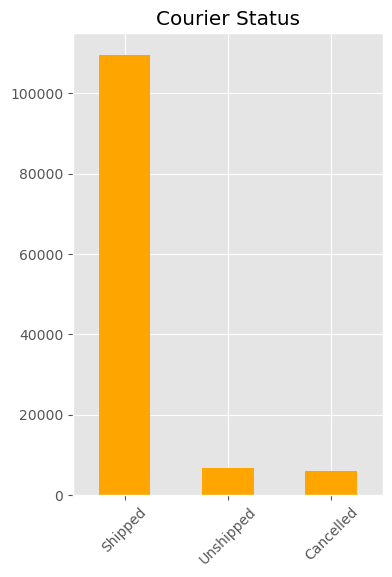

In [23]:
plt.tight_layout()
plt.figure(figsize = (4, 6))
df_copy['Courier Status'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xticks(rotation = 45)
plt.title('Courier Status', color = 'black')

Text(0.5, 1.0, 'Size')

<Figure size 640x480 with 0 Axes>

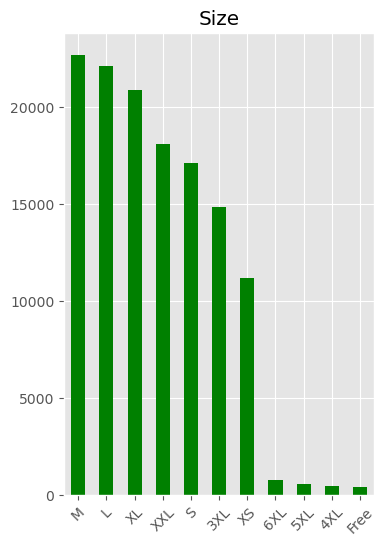

In [24]:
plt.tight_layout()
plt.figure(figsize = (4, 6))
df_copy['Size'].value_counts().plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 45)
plt.title('Size', color = 'black')

Text(0.5, 1.0, 'Category')

<Figure size 640x480 with 0 Axes>

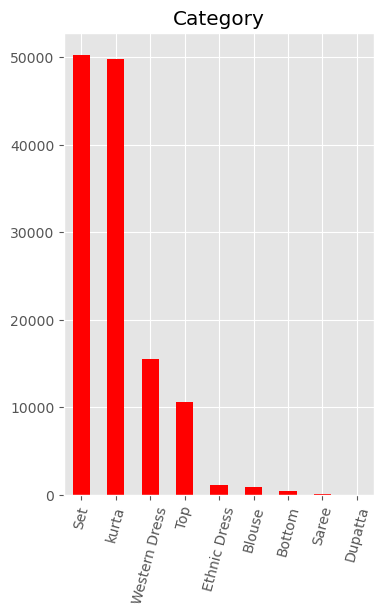

In [25]:
plt.tight_layout()
plt.figure(figsize = (4, 6))
df_copy['Category'].value_counts().plot(kind = 'bar', color = 'red')
plt.xticks(rotation = 75)
plt.title('Category', color = 'black')

Text(0.5, 1.0, 'Status')

<Figure size 640x480 with 0 Axes>

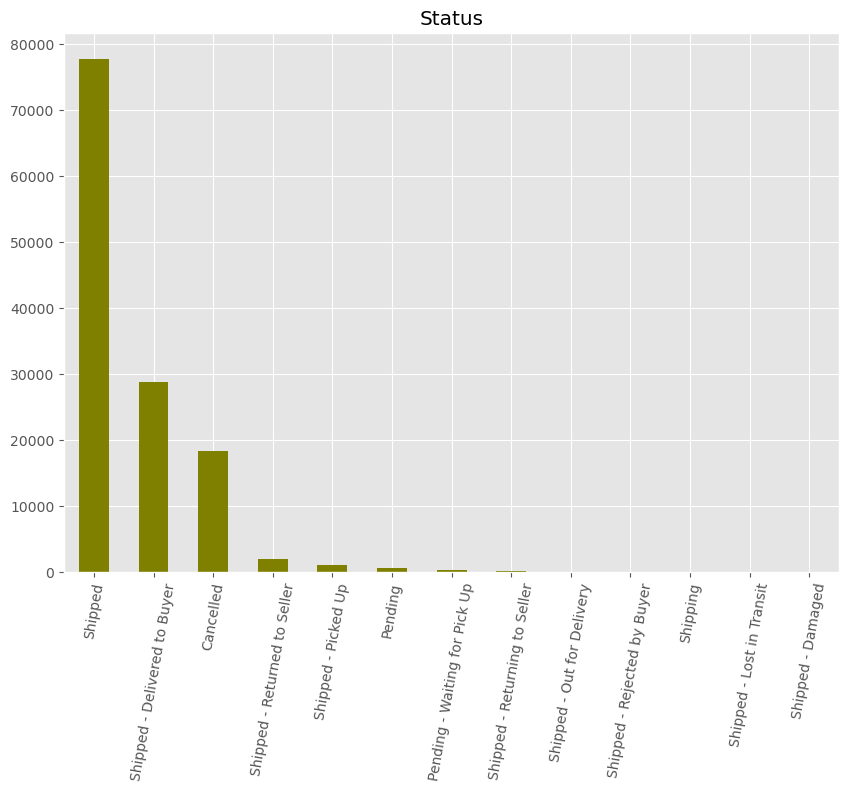

In [26]:
plt.tight_layout()
plt.figure(figsize = (10, 7))
df_copy['Status'].value_counts().plot(kind = 'bar', color = 'olive')
plt.xticks(rotation = 80)
plt.title('Status', color = 'black')

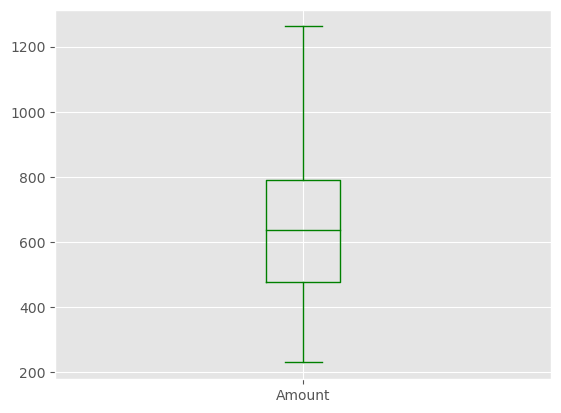

In [27]:
# boxplot to show distribution of Amount values
df.boxplot(column=['Amount'], color='green', showfliers = False)
plt.show()

Text(0.5, 1.0, 'AMOUNT DISTRIBUTION')

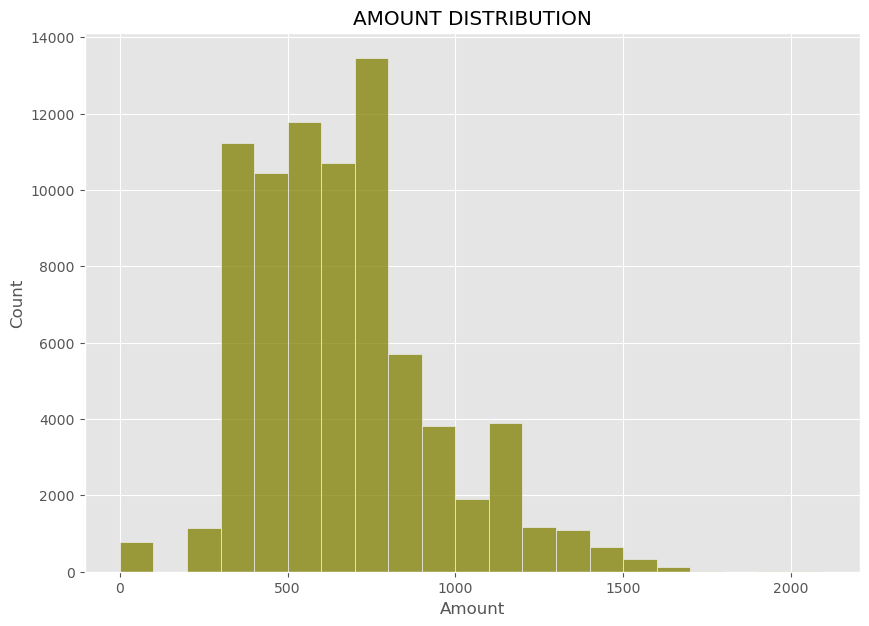

In [28]:
# histogram to show the Amounts distribution
plt.figure(figsize = (10, 7))
sns.histplot(data = df['Amount'], bins = 30, binrange=(0, 2100), binwidth=100, color = 'olive')
plt.title('AMOUNT DISTRIBUTION', color = 'black')

#### bivariate analysis

<Axes: xlabel='Date', ylabel='Amount'>

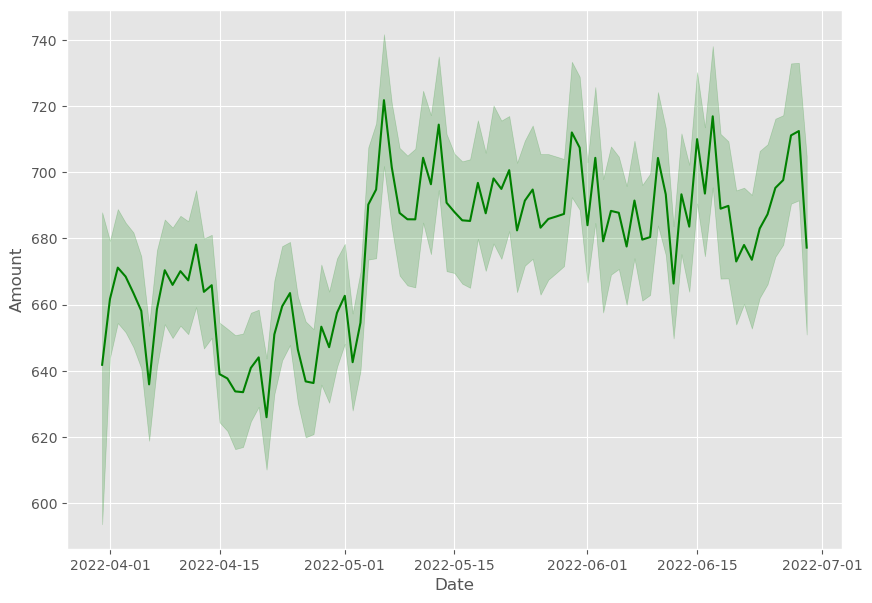

In [29]:
# plotting amount per each day 
plt.figure(figsize = (10, 7))
sns.lineplot(x = df['Date'], y = df['Amount'], color = 'green')

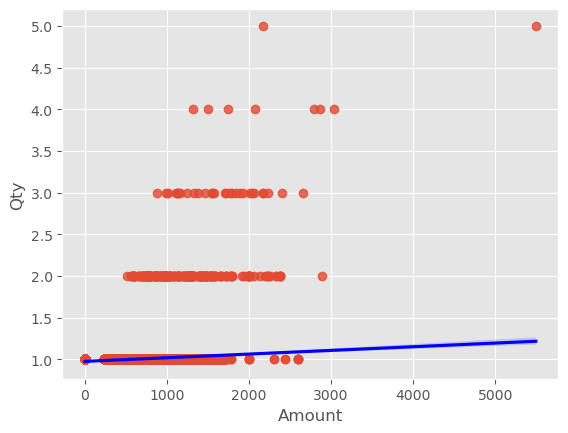

In [30]:
# scatter plot of Qty and Amount 
sns.regplot(x= df['Amount'], y = df['Qty'], line_kws={'color':'blue'})
plt.show()

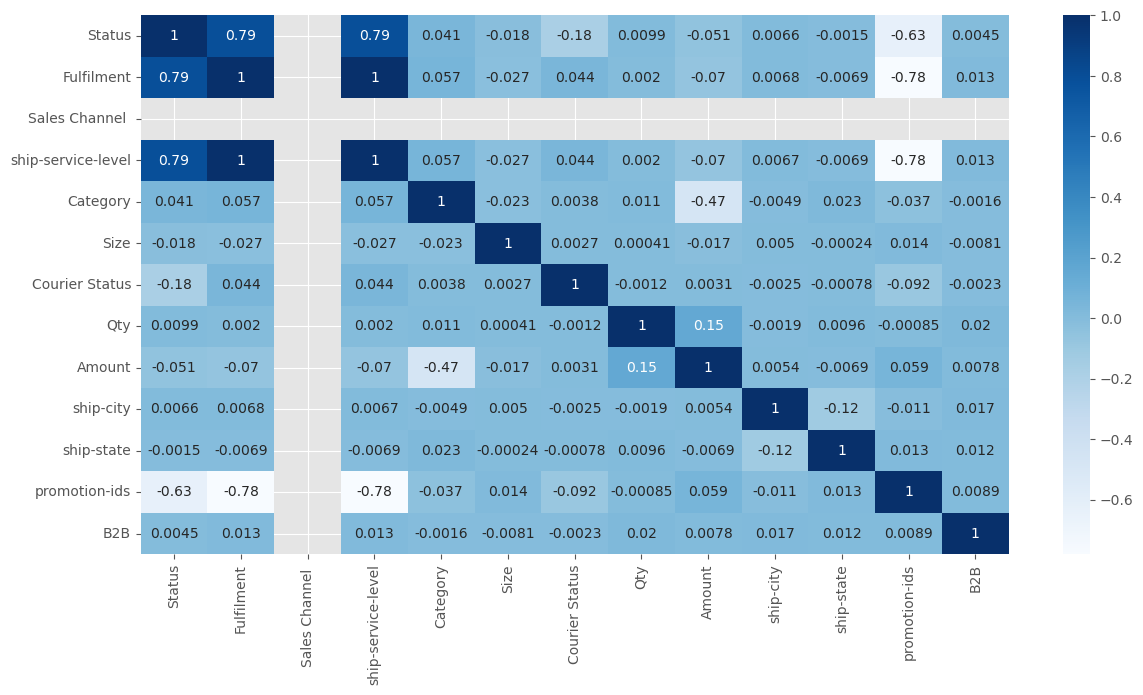

In [33]:
# heatmap to show fields correlation
plt.figure(figsize = (14, 7))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

## OBSERVATIONS 